# 12.1. Plotting the bifurcation diagram of a chaotic dynamical system
Credit: https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter12_deterministic/01_bifurcation.ipynb

The purpose of this notebook to to try and re-create this image for printing:
![text](https://freight.cargo.site/w/900/q/94/i/5842694b2e9449892f149b803b0fcf763355a773dbcca96b54f11b5047c089db/logistics03e1_o.jpg)

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

A functional version of the logistic map which can be iterated recurrsively

$\displaystyle x_{n+1}=rx_{n}\left(1-x_{n}\right)$

In [2]:
def logistic(r, x):
    return r * x * (1 - x)

Lets graph the above function with $r = 2$

$\displaystyle y=2x\left(1-x\right)$

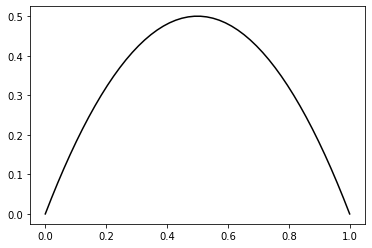

In [3]:
x = np.linspace(0, 1) # create a series from 0 to 1
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k') # create a plot of y = logistic(2,x)

In [4]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
#                               sharey=True)
#plot_system(2.5, .1, 10, ax=ax1)
#plot_system(3.5, .1, 10, ax=ax2)

In [5]:
def convergance_data(r_low=0, # the lowest value of r
                     r_high=6, # the highest value of r
                     n=5000, # n is the number of points to take between r_low and r_high
                     iterations = 10000, # the nnumber of times to iterate logistic() in the hope 'stability is reached'
                     last=100, # the number of points to take from the end of the iteration to plot
                     ax = False,
                     alpha = 0.1
                    ):
    assert(iterations>last)
    x = 1e-5 * np.ones(n) # a series of 0.0005s to feed in as the starting point
    r = np.linspace(r_low, r_high, n) # a series between r_low and r_high with n divisions
    df = pd.DataFrame(index=r) # generate an empty dataframe
    
    for i in range(iterations):
    # perform {iterations} iterations of the logistic function
    
        x = logistic(df.index, x)
        if i % 1000 == 0:
            print('iteration'+str(i)+' of '+str(iterations)) 
        
        if i >= (iterations - last):
            if ax != False:
                ax.plot(x,df.index, marker=',',color = '#18284d', alpha=alpha)
            else:
                # store the last {last} values in the df
                df['iter'+str(i)]=x         
    if ax == False:    
        return df


In [6]:
#r_low, r_high = (2.5 , 4.0)
#df = convergance_data(r_low=r_low, r_high=r_high,n=5000,iterations = 10000,last=100)

In [7]:
#df.shape

In [8]:
#alt.Chart(df.reset_index()).mark_circle(size=10).encode(
#    x='index',
#    y='900:Q',
#).interactive()

In [9]:
def stack(df):
    stacked = (df
               .stack() # convert data to longform so each iteration is a sub-index
               .reset_index() # make the indexes columns
               .drop('level_1',axis=1) # drop the column that was the list of the iteration numbers
               #.drop_duplicates() # for quicker graphing drop duplicate values MAY NEED removing for final product
              )
    stacked.columns = stacked.columns.astype(str) # make sure column titles are strings otherwise altair gets stroppy
    return stacked



In [10]:
#stacked = stack(df)
#sample = stacked.drop_duplicates().sample(900) # create a sample for quick graphing

In [11]:
#alt.Chart(sample).mark_circle(size=2).encode(
#    alt.X('level_0:Q',
#        scale=alt.Scale(zero=False)
#    ),
#    y='0:Q',
#)

Great, this is the logistic map bifurcation diagram, now I want to try to make a pretty graph that echos [this](https://freight.cargo.site/t/original/i/5842694b2e9449892f149b803b0fcf763355a773dbcca96b54f11b5047c089db/logistics03e1_o.jpg)
![text](https://freight.cargo.site/w/900/q/94/i/5842694b2e9449892f149b803b0fcf763355a773dbcca96b54f11b5047c089db/logistics03e1_o.jpg)

In [12]:
#img_stacked = stack(convergance_data(r_low=3.44, r_high=6,n=5000,iterations = 10000,last=100))
#img_sample = img_stacked.drop_duplicates().sample(900) # create a sample for quick graphing

Now for mountain art I want also to swap the x and y axis and have an inverted y axis

In [13]:
#img = alt.Chart(img_sample).mark_circle(size=2).encode(
#    alt.Y('level_0:Q',
#        scale=alt.Scale(domain=[r_high,3.42])
#    ),
#    alt.X('0:Q')
#)

#img

The original image is about 16:9 and has no lines

In [14]:
#inches = 2 # set to desired width in inches
#ratio = 16/9 # set the width/height ratio of the desired plot
#img.configure_axis(
#    grid=False
#).configure_view(
#    strokeWidth=0
#).properties(
#    height = inches*300/ratio,
#    width = inches*300
#)



Starting to look even better, now for the final product

In [41]:
inches = 36 # set to desired width in inches
dpi = 300 # this is the desired dots per inch
ratio = 16/9 # set the width/height ratio of the desired plot
pdr = 1/1 # this is the number of pixels per dot
iterations = 10000+int(inches*dpi*pdr) # set to 10000 for final run
r_low, r_high= (3.448,4.0)
#final_stacked = stack(convergance_data(r_low=r_low, r_high=r_high,n=int(inches*dpi/ratio*pdr),iterations = 10000,last=int(inches*dpi*pdr)))
#final_stacked.shape

In [42]:
#rows, cols = final_stacked.shape
#assert(rows < 8000000)
#final_sample = final_stacked.sample(900) # create a sample for quick graphing

In [43]:
'''
alt.data_transformers.disable_max_rows() # we are going to be e
chart = alt.Chart(final_stacked).mark_circle(size=1/pdr, opacity=pdr, color = '#18284d').encode(
    alt.Y('level_0:Q',
        scale=alt.Scale(domain=[r_high,r_low]),
          axis =None
    ),
    alt.X('0:Q', 
          axis=None)
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).properties(
    height = inches*300/ratio,
    width = inches*300
)
#chart.save('chart.svg')
chart.save('chart.html')
chart.save('chart.png', scale_factor = 2.0)
#chart
'''

"\nalt.data_transformers.disable_max_rows() # we are going to be e\nchart = alt.Chart(final_stacked).mark_circle(size=1/pdr, opacity=pdr, color = '#18284d').encode(\n    alt.Y('level_0:Q',\n        scale=alt.Scale(domain=[r_high,r_low]),\n          axis =None\n    ),\n    alt.X('0:Q', \n          axis=None)\n).configure_axis(\n    grid=False\n).configure_view(\n    strokeWidth=0\n).properties(\n    height = inches*300/ratio,\n    width = inches*300\n)\n#chart.save('chart.svg')\nchart.save('chart.html')\nchart.save('chart.png', scale_factor = 2.0)\n#chart\n"

In [44]:
#plt.scatter(final_stacked['0'],final_stacked['level_0'])
#plt.show()

In [ ]:

final_stacked = stack(convergance_data(r_low=r_low, r_high=r_high,n=int(inches*dpi/ratio*pdr),iterations = iterations,last=int(inches*dpi*pdr)))
print(final_stacked.shape)

iteration0 of 20800
iteration1000 of 20800
iteration2000 of 20800
iteration3000 of 20800
iteration4000 of 20800
iteration5000 of 20800
iteration6000 of 20800
iteration7000 of 20800
iteration8000 of 20800
iteration9000 of 20800
iteration10000 of 20800
iteration11000 of 20800
iteration12000 of 20800


In [ ]:
#final_sample = final_stacked.sample(10000)
fig, ax = plt.subplots(num=None, 
                       figsize=(inches, inches/(ratio)),
                       dpi=dpi
                      )
ax.scatter(final_stacked['0'],final_stacked['level_0'], alpha=0.2, c='#18284d', marker="s", s=(72./fig.dpi)**2, edgecolor="None")
print('axis made')
ax.invert_yaxis()

ax.axis("off")
ax.grid(False)
#fig.tight_layout()
plt.savefig('foo.png', bbox_inches='tight')
plt.show()
print('axis shown')

<Figure size 432x288 with 0 Axes>